2022-05-03 <br/>
Solar/Wind utilities <br/>
https://github.com/rfordatascience/tidytuesday/blob/master/data/2022/2022-05-03/readme.md

Single Axis Range Slider - Complete <br/>
Dual Axis Range Slider - Complete 

In [9]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.renderers.default='jupyterlab'
import os

In [56]:
df = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-05-03/capacity.csv')

In [57]:
df.head()

,type,year,standalone_prior,hybrid_prior,standalone_new,hybrid_new,total_gw
0,Solar,2014,25.052420,0.00000,19.511700,0.00000,44.564120
1,Solar,2015,33.055120,0.00000,23.763492,0.00000,56.818612
2,Solar,2016,36.977478,0.00000,83.332539,0.00000,120.310017
3,Solar,2017,83.578314,0.00000,104.931034,0.00000,188.509348
4,Solar,2018,138.198438,11.55625,115.544645,17.66671,282.966042


In [92]:
import plotly.express as px



fig0 = px.line(df, x='year', y='total_gw', title='Time Series - Initial ', color ='type' )

# fig0.update_xaxes(rangeslider_visible=True)
fig0.show()

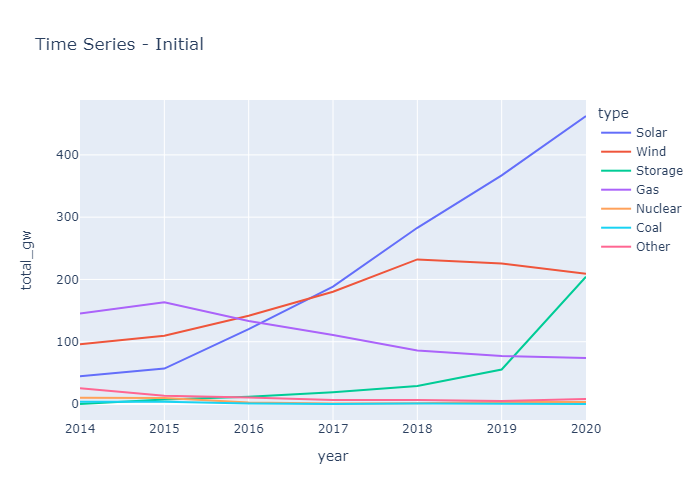

In [93]:
# Display Output in production
img_bytes = fig0.to_image(format="png")
from IPython.display import Image
Image(img_bytes)


In [94]:
fig0 = go.Figure()
for c in df['type'].unique():
    df1 = df[df['type']==c]
    fig0.add_traces(go.Scatter(x=df1['year'], y = df1['total_gw'], name = c))
fig0.update_layout(title = "Time Series - Using Graph Object")
fig0.show()

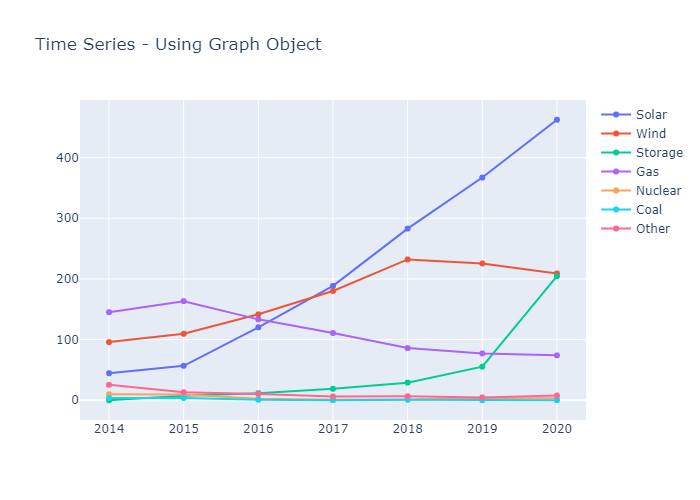

In [96]:
# Display Output in production
img_bytes = fig0.to_image(format="png")
from IPython.display import Image
Image(img_bytes)


In [97]:

fig1 = px.bar(df, x='year', y='total_gw', title='Bar Chart - Initial', color ='type' )

fig1.show()

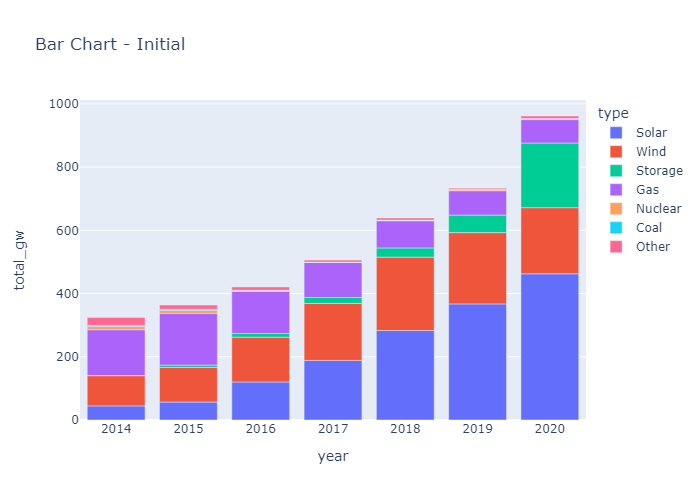

In [99]:
# Display Output in production
img_bytes = fig1.to_image(format="png")
from IPython.display import Image
Image(img_bytes)


In [100]:
fig1 = go.Figure()
for c in df['type'].unique():
    df1 = df[df['type']==c]
    fig1.add_traces(go.Bar(x=df1['year'], y = df1['total_gw'], name = c))
fig1.update_layout(barmode='stack',title = 'Bar Chart - Graph Object')
fig1.show()

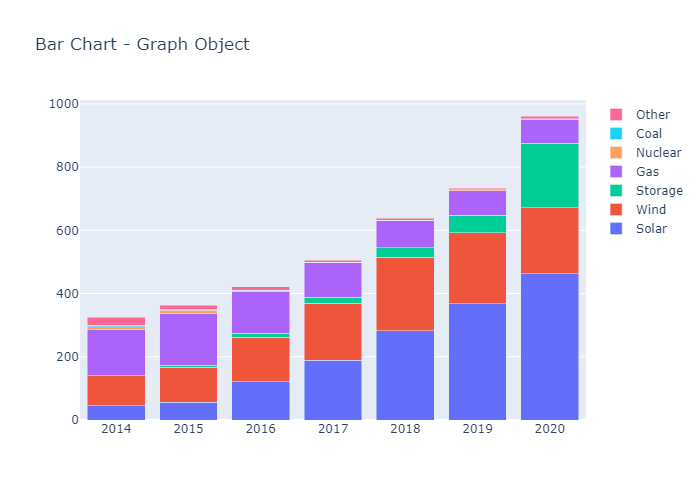

In [101]:
# Display Output in production
img_bytes = fig1.to_image(format="png")
from IPython.display import Image
Image(img_bytes)


In [103]:
# Single Axis Range Slider
from plotly.subplots import make_subplots
fig = make_subplots(
    rows=1, cols=1,
    specs=[[{"type": "xy"}]
           ],
)

#fig.add_trace(list(fig0.data)[:], row=1, col=1)
fig.add_traces(
    list(fig0.select_traces())
)


fig.update_layout(xaxis_rangeslider_visible=True, 
                  xaxis_type="date",
                  title = "Single Axis Range Slider")

fig.show()

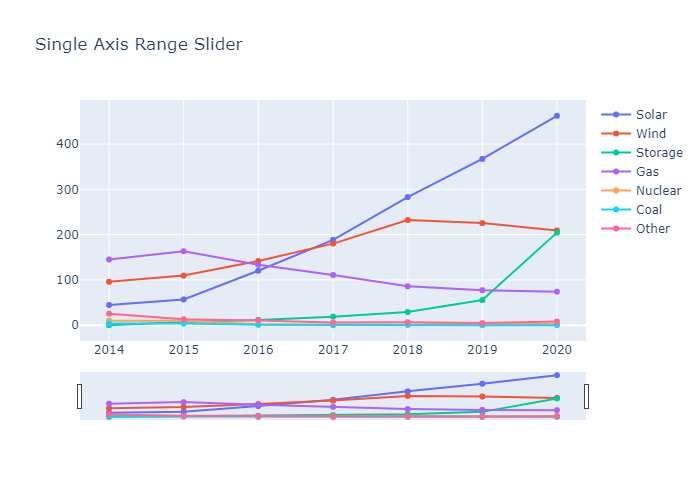

In [104]:
# Display Output in production
img_bytes = fig.to_image(format="png")
from IPython.display import Image
Image(img_bytes)


In [118]:
#Dual Axis Range Slider
from plotly.subplots import make_subplots
fig = make_subplots(
    rows=2, cols=1,
    specs=[[{"type": "xy"}],
           [{"type": "xy"}]],
    shared_xaxes=True
)

fig.add_trace(fig1.data[0], row=1, col=1)

fig.add_trace(fig0.data[0], row=2, col=1)

# fig.update_layout(xaxis_rangeslider_visible=False, 
#                   xaxis2_rangeslider_visible=True, 
#                   xaxis_type="date",
#                   title = "Dual Axis Range Slider")
fig.update_layout(
    xaxis_type="date",#end xaxis  definition
    xaxis2_rangeslider_visible=True,
    xaxis2_type="date",
    title = "Dual Axis Range Slider"
    );
fig.show()

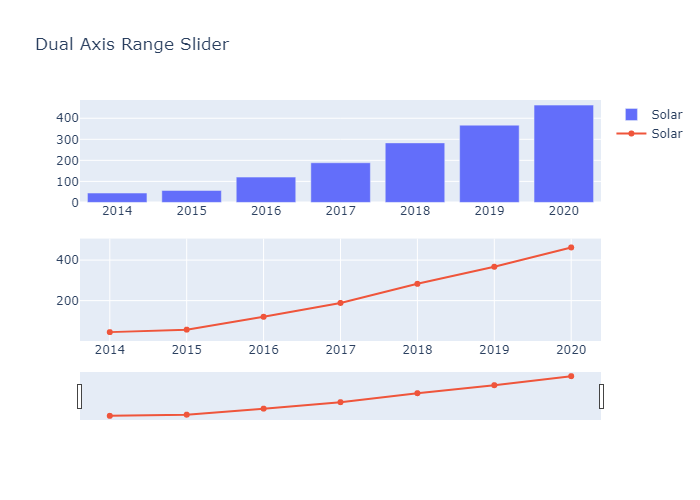

In [108]:
# Display Output in production
img_bytes = fig.to_image(format="png")
from IPython.display import Image
Image(img_bytes)
